# Sentimen Analisis

Muhammad Ghifari Zuhir

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

stop = stopwords.words('english')
pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_json('/content/drive/MyDrive/Dicoding/NLP/Clothing_Shoes_and_Jewelry_5.json', lines=True)

In [ ]:
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1KLRMWW2FWPL4,0000031887,"Amazon Customer ""cameramom""","[0, 0]",This is a great tutu and at a really great price. It doesn't look cheap at all. I'm so glad I looked on Amazon and found such an affordable tutu that isn't made poorly. A++,5,Great tutu- not cheaply made,1297468800,"02 12, 2011"
1,A2G5TCU2WDFZ65,0000031887,Amazon Customer,"[0, 0]","I bought this for my 4 yr old daughter for dance class, she wore it today for the first time and the teacher thought it was adorable. I bought this to go with a light blue long sleeve leotard and was happy the colors matched up great. Price was very good too since some of these go for over $15.00 dollars.",5,Very Cute!!,1358553600,"01 19, 2013"
2,A1RLQXYNCMWRWN,0000031887,Carola,"[0, 0]","What can I say... my daughters have it in orange, black, white and pink and I am thinking to buy for they the fuccia one. It is a very good way for exalt a dancer outfit: great colors, comfortable, looks great, easy to wear, durables and little girls love it. I think it is a great buy for costumer and play too.",5,I have buy more than one,1357257600,"01 4, 2013"
3,A8U3FAMSJVHS5,0000031887,Caromcg,"[0, 0]","We bought several tutus at once, and they are got high reviews. Sturdy and seemingly well-made. The girls have been wearing them regularly, including out to play, and the tutus have stood up well. Fits the 3-yr old & the 5-yr old well. Clearly plenty of room to grow. Only con is that when the kids pull off the tutus, the waste band gets twisted, and an adult has to un-tangle. But this is not difficult.",5,"Adorable, Sturdy",1398556800,"04 27, 2014"
4,A3GEOILWLK86XM,0000031887,CJ,"[0, 0]","Thank you Halo Heaven great product for Little Girls. My Great Grand Daughters Love these Tutu's. Will buy more from this seller. Made well and cute on the girls. Thanks for a great product.NEVER BUY FROM DRESS UP DREAMS........I will buy more as long as I don't buy from &#34;Dress Up Dreams&#34; I never rec'd or order in FL. Only rec'd pink, the purple one was missing. Company is a rip off. REFUSES to make good on purchase...... Real creeps.",5,Grammy's Angels Love it,1394841600,"03 15, 2014"
...,...,...,...,...,...,...,...,...,...
278672,A2DG63DN704LOI,B00KKXCJQU,ESlayd,"[0, 1]","I don't normally go ga-ga over a product very often, but these cubes are so awesome I couldn't help myself. Here's my review:I'm a pretty organized guy. At home, I keep my things where they belong, and there's a place for everything.I am also a frequent traveler.And when I travel, something goes wrong. My neatness turns into something else. It all starts innocently enough. I pack everything perfectly. Underwear here, shorts in a stack, tshirts on the left, dress shirts and slacks on the right, toiletries on the top. Then, once I get to the hotel and change clothes, the whole case is in shambles. And it only gets worse. If I'm on a week-long trip, I'm doomed by day 3.Now, enter the Shacke Packing Cubes! What a brilliant idea, and yet such a simple one. Pack packs in your pack! These little wonders have allowed me to compartmentalize my suitcase in a way that the little zippered pockets around the sides never did. I just put each category of clothes (i.e. shorts, underwear, etc.) it its own ""cube"". Then, when I need a pair of boxers, I just go straight to the source and pull one out. No hunting, no pecking. And no suitcase that already looks like a laundry basket at the start of the trip.In conclusion, these are so good, I've got to order myself a second set.[sample provided for an honest review]",5,These have literally changed the way I travel!,1403568000,"06 24, 2014"
278673,A1EVV74UQYVKRY,B00KKXCJQU,K. Groh,"[0, 0]","I've been traveling back and forth to England since I was three. I've packed way too many suitcases. Some were well packed, most were not. I tend to throw things in and dig for them later.This is a great idea for packing more ne

In [ ]:
df = df[['reviewText', 'overall']]
df = df.loc[(df.overall != 4)]
df = df.loc[(df.overall != 2)]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204857 entries, 0 to 278676
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   reviewText  204857 non-null  object
 1   overall     204857 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 4.7+ MB


In [ ]:
category = pd.get_dummies(df.overall)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='overall')
df_baru = df_baru.drop_duplicates(subset=['reviewText'])

In [ ]:
def listToString(s):

  str1 = " "
  
  return (str1.join(s))

In [ ]:
df_stop = df_baru.copy()
df_stop['reviewText'] = df_stop['reviewText'].str.lower().str.split()
df_stop['reviewText'] = df_stop['reviewText'].apply(lambda x: [item for item in x if item not in stop])

df_stop['reviewText'] = df_stop['reviewText'].apply(listToString)

In [ ]:
df_stop

,reviewText,1,3,5
0,great tutu really great price. look cheap all. i'm glad looked amazon found affordable tutu made poorly. a++,0,0,1
1,"bought 4 yr old daughter dance class, wore today first time teacher thought adorable. bought go light blue long sleeve leotard happy colors matched great. price good since go $15.00 dollars.",0,0,1
2,"say... daughters orange, black, white pink thinking buy fuccia one. good way exalt dancer outfit: great colors, comfortable, looks great, easy wear, durables little girls love it. think great buy costumer play too.",0,0,1
3,"bought several tutus once, got high reviews. sturdy seemingly well-made. girls wearing regularly, including play, tutus stood well. fits 3-yr old & 5-yr old well. clearly plenty room grow. con kids pull tutus, waste band gets twisted, adult un-tangle. difficult.",0,0,1
4,"thank halo heaven great product little girls. great grand daughters love tutu's. buy seller. made well cute girls. thanks great product.never buy dress dreams........i buy long buy &#34;dress dreams&#34; never rec'd order fl. rec'd pink, purple one missing. company rip off. refuses make good purchase...... real creeps.",0,0,1
...,...,...,...,...
278672,"normally go ga-ga product often, cubes awesome help myself. here's review:i'm pretty organized guy. home, keep things belong, there's place everything.i also frequent traveler.and travel, something goes wrong. neatness turns something else. starts innocently enough. pack everything perfectly. underwear here, shorts stack, tshirts left, dress shirts slacks right, toiletries top. then, get hotel change clothes, whole case shambles. gets worse. i'm week-long trip, i'm doomed day 3.now, enter shacke packing cubes! brilliant idea, yet simple one. pack packs pack! little wonders allowed compartmentalize suitcase way little zippered pockets around sides never did. put category clothes (i.e. shorts, underwear, etc.) ""cube"". then, need pair boxers, go straight source pull one out. hunting, pecking. suitcase already looks like laundry basket start trip.in conclusion, good, i've got order second set.[sample provided honest review]",0,0,1
278673,"i've traveling back forth england since three. i've packed way many suitcases. well packed, not. tend throw things dig later.this great idea packing neatly effectively. many sizes, one everything including shirts, pants, socks underwear. easy pull out, easy unpack. like addition laundry bag pretty small. like using shoes, like floating around suitcase. fit unmentionables maybe couple shirts. could use taking clothes local laundromat black, one see what's inside.these nicely made, reinforced seams, ventilation/visibility mesh, zipper closures.i provided sample review.",0,0,1
278674,"nice packing cubes 18 x 21 in. laundry storage bag nice bonus.the four-inch depth mix sizes provided ideal organizing suitcases, especially rolling carry-ons, typically limited approximately 22 in. x 14 in. x 9 in.combining two sets allows even versatility choice; would suggest getting three sets use couple.they indeed well-made, claimed, high-quality smoothly-working zippers easy-to-spot pulls, contrasting taped seams, carrying handles. nylon fabric tough water-resistant ventilating mesh top snag-resistant.i looking packing cubes different stores online several years, thoughtfully-designed ones i've seen, overall particularly four-inch depth.a sample provided evaluation review",0,0,1
278675,"vacation family four shacke pak set wonderful. except husband, share suitcase. underwear socks always jumble, anymore. kid gets shacke pak. get one, also, one spare loose personal supplies. wonderful luggage look clutter.the set comes laundry bag, admit bit small family, even single person who's packed weekend trip. bags trips always find purpose, though. used haul supplies cabin showers.the shack pak bags getting good workout, basically running three separate vacations month. i'm still using daughter using next week.i like mesh lets us see what's inside with

In [ ]:
review = df_stop['reviewText'].values
sentiment = df_stop[[1,3,5]].values

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(review, sentiment, test_size=0.2, stratify = sentiment, random_state=101)

In [ ]:
tokenizer = Tokenizer(num_words=2500, oov_token='x')
tokenizer.fit_on_texts(X_train)
 
seq_train = tokenizer.texts_to_sequences(X_train)
seq_val = tokenizer.texts_to_sequences(X_val)
 
train_pad = pad_sequences(seq_train) 
val_pad = pad_sequences(seq_val)

In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Embedding(input_dim=2500, output_dim=30),
                             tf.keras.layers.LSTM(64),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(32, activation='relu'),
                             tf.keras.layers.Dense(3, activation='softmax')])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
num_epochs = 300
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

history = model.fit(train_pad, y_train, 
                    validation_data=(val_pad, y_val),
                    epochs=num_epochs,
                    callbacks = [es],
                    batch_size = 512)

Epoch 1/300
320/320 [==============================] - 76s 234ms/step - loss: 0.4403 - accuracy: 0.8339 - val_loss: 0.3589 - val_accuracy: 0.8570
Epoch 2/300
320/320 [==============================] - 74s 232ms/step - loss: 0.3351 - accuracy: 0.8671 - val_loss: 0.3230 - val_accuracy: 0.8742
Epoch 3/300
320/320 [==============================] - 74s 230ms/step - loss: 0.3103 - accuracy: 0.8786 - val_loss: 0.3254 - val_accuracy: 0.8745
Epoch 4/300
320/320 [==============================] - 74s 231ms/step - loss: 0.3014 - accuracy: 0.8817 - val_loss: 0.3187 - val_accuracy: 0.8761
Epoch 5/300
320/320 [==============================] - 75s 233ms/step - loss: 0.2944 - accuracy: 0.8850 - val_loss: 0.3212 - val_accuracy: 0.8755
Epoch 6/300
320/320 [==============================] - 75s 234ms/step - loss: 0.2854 - accuracy: 0.8885 - val_loss: 0.3160 - val_accuracy: 0.8768
Epoch 7/300
320/320 [==============================] - 75s 234ms/step - loss: 0.2788 - accuracy: 0.8916 - val_loss: 0.3174 -

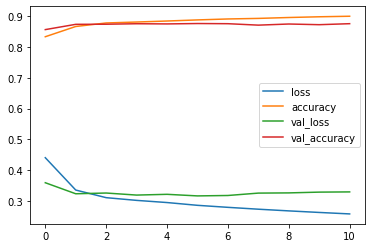

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()